**Первая часть** предполагает работу с результатами опроса студентов Вышки, в ходе которого респондентам предлагалось выбрать наиболее интересных героев сказки «Не покидай...» на основе следующей информации:

* по предложенному текстовому описанию (как в пьесах, без подробностей, намекающих на развитие сюжета);
* по предложенным кадрам из фильма (актёры в образе героев в разных ситуациях).

По итогам опроса фиксировалось следующее: выбор героев по текстовому описанию (не более двух героев), итоговый выбор героев после ознакомления с кадрами из фильма (не более двух героев), лайки/дизлайки представленным образам героев. Ознакомиться с опросником, чтобы быть более погружённым в контекст задания, можно по [ссылке](https://forms.gle/GwfroJXuBXtrxH959). 

**Вторая часть** включает кластерный анализ полученных результатов опроса.


## Часть 1. Обработка данных (10 баллов)

В файле `NPK_24_last.xlsx` (скачать [здесь](https://disk.yandex.ru/i/_UJfWjvkb5EJ6w)) сохранены результаты опроса, описанного в начале этого файла:

* лист `описание`: выбор героев по текстовому описанию;
* лист `лайки`: лайки/дизлайки, поставленные на основе кадров;
* лист `итоговый выбор`: итоговый выбор героев.

Таблицы на всех листах обладают одинаковой структурой, в первых столбцах зафиксирован профиль обучения респондентов, уровень обучения, пол. В столбцах с именами основных героев сохранены бинарные индикаторы, отражающие факт выбора героя на разных этапах опроса:

* в таблицах `описание` и `итоговый выбор` значение 1 означает, что респондент проголосовал за героя, то есть выбрал его как интересного (можно было выбрать не более двух);

* в таблице `лайки` значение 1 соответствует лайку, значение 0 – дизлайку.

In [32]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering

### Задача 1. Загружаем и агрегируем результаты опроса (2 балла)

Загрузите в Python данные с листа `итоговый выбор` файла `NPK_24_last.xlsx` и сохраните их в датафрейм `poll`. Выберите из `poll` столбцы, соответствующие основным героям сказки (с Теодора по Марселлу) и сохраните их в отдельный датафрейм `small`. 

Посчитайте число проголосовавших за каждого героя и сохраните результаты в виде объекта `res` типа *Series*. Отсортируйте значения по убыванию. Результат должен выглядеть так:

    Оттилия     107
    Патрик       67
    Марта        63
    Жак          62
    Давиль       61
    Альбина      24
    Теодор       22
    Марселла     21
    Пенапью      19
    Флора         7
    dtype: int64

In [ ]:
file_path = 'data/NPK_24_last.xlsx'
poll = pd.read_excel(file_path, sheet_name='итоговый выбор')

heroes_columns = ['Теодор', 'Альбина', 'Давиль', 'Жак', 'Марта', 'Патрик', 'Оттилия', 'Марселла', 'Флора', 'Пенапью']
small = poll[heroes_columns]

res = small.sum().sort_values(ascending=False)

print(res)



Оттилия     107
Патрик       67
Марта        63
Жак          62
Давиль       61
Альбина      24
Теодор       22
Марселла     21
Пенапью      19
Флора         7
dtype: int64


### Задача 2. Визуализируем данные (2 балла)

Постройте столбиковую диаграмму, отражающую число проголосовавших за каждого из героев. На диаграмме должно быть 10 столбцов, упорядоченных по убыванию высоты. Измените цвета графика, скорректируйте подписи при необходимости.

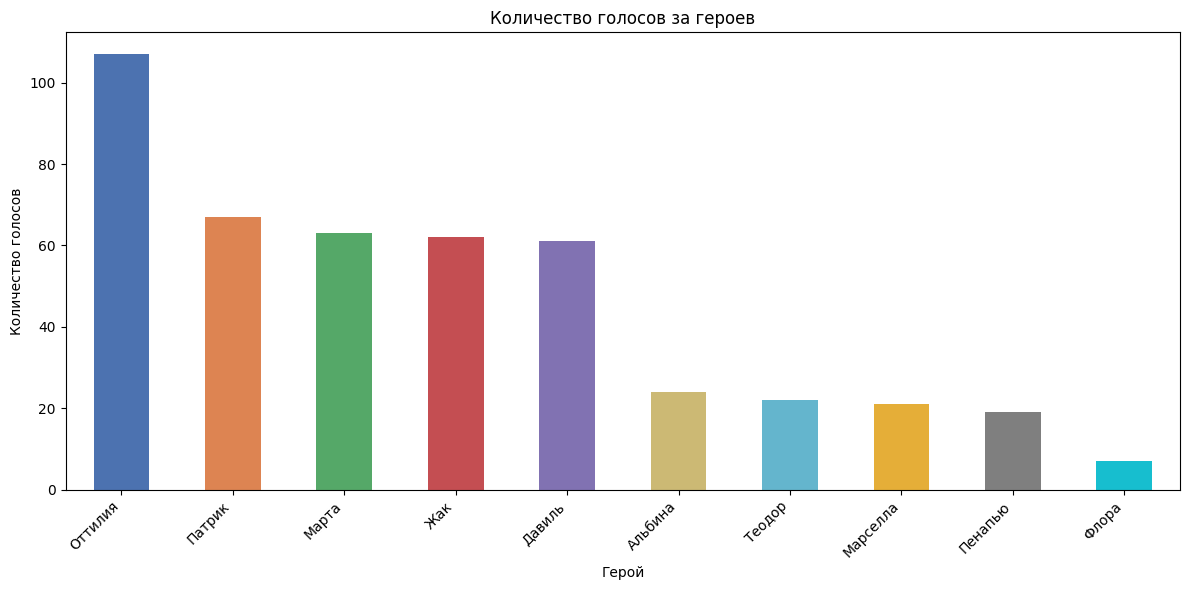

In [7]:
plt.figure(figsize=(12, 6))
res.plot(kind='bar', color=['#4C72B0', '#DD8452', '#55A868', '#C44E52', '#8172B2', '#CCB974', '#64B5CD', '#E5AE38', '#7F7F7F', '#17BECF'])
plt.title('Количество голосов за героев')
plt.xlabel('Герой')
plt.ylabel('Количество голосов')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('chart1.svg')
plt.show()

### Задача 3. Изучаем данные (2 балла)

1. Определите, любым способом, респондентов какого пола участвовало в опросе больше.
2. Выведите на экран перечень уникальных значений профилей студентов, которые участовали в опросе.

In [10]:
gender_counts = poll['пол'].value_counts()

print("Количество респондентов по полу:")
print(gender_counts)

if gender_counts['жен'] > gender_counts['муж']:
    print("В опросе участвовало больше респондентов женского пола.")
else:
    print("В опросе участвовало больше респондентов мужского пола.")

unique_profiles = poll.drop(heroes_columns, axis=1).drop_duplicates().values.flatten()

print("\nУникальные значения профилей студентов:")
print(unique_profiles)

Количество респондентов по полу:
пол
жен    120
муж    107
Name: count, dtype: int64
В опросе участвовало больше респондентов женского пола.

Уникальные значения профилей студентов:
[35 4 'политология и управление' ... 'бакалавры' 3.0 'муж']


### Задача 4. Преобразуем данные (2 балла)

Добавьте в датафрейм `poll` столбец `профиль2` со следующими значениями:

* `социально-экономический`, если в профиле указаны значения `политология и управление`, `право и экономика`;
* `информационно-математический`, если в профиле указано значение `математика и информатика`;
* `другое`, если иное.

In [14]:
poll['профиль2'] = 'другое'

poll.loc[poll['профиль'].isin(['политология и управление', 'право и экономика']), 'профиль2'] = 'социально-экономический'
poll.loc[poll['профиль'] == 'математика и информатика', 'профиль2'] = 'информационно-математический'

print(poll)


       id  опрос                   профиль    уровень  группа  пол  Теодор  \
0      35      4  политология и управление  бакалавры     NaN  жен       0   
1      36      4  политология и управление  бакалавры     NaN  жен       0   
2      37      4  политология и управление  бакалавры     NaN  жен       0   
3      38      4  политология и управление  бакалавры     NaN  жен       0   
4      39      4  политология и управление  бакалавры     NaN  муж       0   
..    ...    ...                       ...        ...     ...  ...     ...   
230  1022     10  математика и информатика  бакалавры     2.0  муж       0   
231  1023     10  математика и информатика  бакалавры     4.0  жен       0   
232  1024     10  математика и информатика  бакалавры     4.0  муж       0   
233  1025     10  математика и информатика  бакалавры     3.0  муж       1   
234  1026     10  математика и информатика  бакалавры     3.0  муж       0   

     Флора  Альбина  Патрик  Пенапью  Давиль  Оттилия  Жак  Мар

### Задача 5. Группируем данные (2 балла)

Выберите любых двух интересных вам героев и: 

* сгруппируйте строки в `poll` по значению столбца `профиль2` и определите, сколько студентов каждого профиля проголосовало за них;

* сгруппируйте строки в `poll` по значению столбца `пол` и определите, сколько студентов мужского и женского пола проголосовало за них;

* сгруппируйте строки в `poll` по значениям `профиль2` и `пол` сразу и выведите аналогичную выдачу на экран.

In [15]:
profile_votes = poll.groupby('профиль2')[['Оттилия', 'Патрик']].sum()
print("Голоса за Оттилию и Патрика по профилям:")
print(profile_votes)

gender_votes = poll.groupby('пол')[['Оттилия', 'Патрик']].sum()
print("\nГолоса за Оттилию и Патрика по полу:")
print(gender_votes)

profile_gender_votes = poll.groupby(['профиль2', 'пол'])[['Оттилия', 'Патрик']].sum()
print("\nГолоса за Оттилию и Патрика по профилям и полу:")
print(profile_gender_votes)


Голоса за Оттилию и Патрика по профилям:
                              Оттилия  Патрик
профиль2                                     
другое                              8       7
информационно-математический       28      14
социально-экономический            71      46

Голоса за Оттилию и Патрика по полу:
     Оттилия  Патрик
пол                 
жен       69      31
муж       35      33

Голоса за Оттилию и Патрика по профилям и полу:
                                  Оттилия  Патрик
профиль2                     пол                 
другое                       жен        6       3
                             муж        2       4
информационно-математический жен       16       8
                             муж        9       3
социально-экономический      жен       47      20
                             муж       24      26


## Часть 2: Иерархический кластерный анализ (15 баллов)

### Задача 1 (2 балла)

Загрузите данные из того же файла `NPK_24_last.xlsx` и сохраните их в датафреймы:

* данные с листа `описание` – в датафрейм `text`;
* данные с листа `итоговый выбор` – в датафрейм `final`.

Сохраните в датафреймы `text_cur` и `final_cur` строки из датафреймов `text` и `final`, которые соответствуют студентам, участвующих в сериях опроса 3, 4, 9, 10 (столбец `опрос`). Это будут сопоставимые группы студентов:

* `3` – 2 курс ОП «Бизнес-информатика» прошлого учебного года, `10` – 2 курс ОП «Бизнес-информатика» этого года;
* `4` – 1 курс ОП «Политология» прошлого года, `9` – 1 курс ОП «Политология» этого года.

In [16]:
text = pd.read_excel(file_path, sheet_name='описание')
final = pd.read_excel(file_path, sheet_name='итоговый выбор')

text_cur = text[text['опрос'].isin([3, 4, 9, 10])]
final_cur = final[final['опрос'].isin([3, 4, 9, 10])]

print("Датафрейм text:")
print(text)
print("\nДатафрейм final:")
print(final)
print("\nДатафрейм text_cur:")
print(text_cur)
print("\nДатафрейм final_cur:")
print(final_cur)

Датафрейм text:
       id  опрос                   профиль    уровень  группа  пол  Теодор  \
0      35      4  политология и управление  бакалавры     NaN  жен       0   
1      36      4  политология и управление  бакалавры     NaN  жен       0   
2      37      4  политология и управление  бакалавры     NaN  жен       0   
3      38      4  политология и управление  бакалавры     NaN  жен       0   
4      39      4  политология и управление  бакалавры     NaN  муж       0   
..    ...    ...                       ...        ...     ...  ...     ...   
230  1022     10  математика и информатика  бакалавры     2.0  муж       0   
231  1023     10  математика и информатика  бакалавры     4.0  жен       0   
232  1024     10  математика и информатика  бакалавры     4.0  муж       0   
233  1025     10  математика и информатика  бакалавры     3.0  муж       1   
234  1026     10  математика и информатика  бакалавры     3.0  муж       1   

     Флора  Альбина  Патрик  Пенапью  Давиль  О

### Задача 2 (1 балл)

Выберите из датафрейма `text_cur` столбцы, соответствующие основным героям сказки (с Теодора по Марселлу) и сохраните их в отдельный датафрейм `text_ans`. В датафрейме `text_ans` должно быть 10 бинарных столбцов.

In [17]:
text_ans = text_cur[['Теодор', 'Флора', 'Альбина', 'Патрик', 'Пенапью', 'Давиль', 'Оттилия', 'Жак', 'Марта', 'Марселла']]

print("Датафрейм text_ans:")
print(text_ans)

Датафрейм text_ans:
     Теодор  Флора  Альбина  Патрик  Пенапью  Давиль  Оттилия  Жак  Марта  \
0         0      1        1       0        0       0        0    0      0   
1         0      0        0       0        0       1        0    1      0   
2         0      0        0       0        0       0        0    1      0   
3         0      0        0       1        1       0        0    0      0   
4         0      0        0       0        0       1        1    0      0   
..      ...    ...      ...     ...      ...     ...      ...  ...    ...   
230       0      0        1       1        0       0        0    0      0   
231       0      0        0       0        1       0        0    1      0   
232       0      0        0       0        1       1        0    0      0   
233       1      0        0       0        0       1        0    0      0   
234       1      0        0       0        0       0        0    1      0   

     Марселла  
0           0  
1           0  
2      

### Задача 3 (1 балл)

Используя данные `text_ans`, реализуйте иерархический кластерный анализ, выбрав в качестве метрики манхэттенское расстояние и метод средней связи в качестве метода агрегирования. Постройте дендрограмму. Поделите респондентов на три кластера, сохраните метки кластеров в столбец `clusters_bin` в датафрейм `text_cur`.

C:\Users\User\AppData\Local\Temp\ipykernel_1496\2220412623.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_cur['clusters_bin'] = clusters[:, 0]


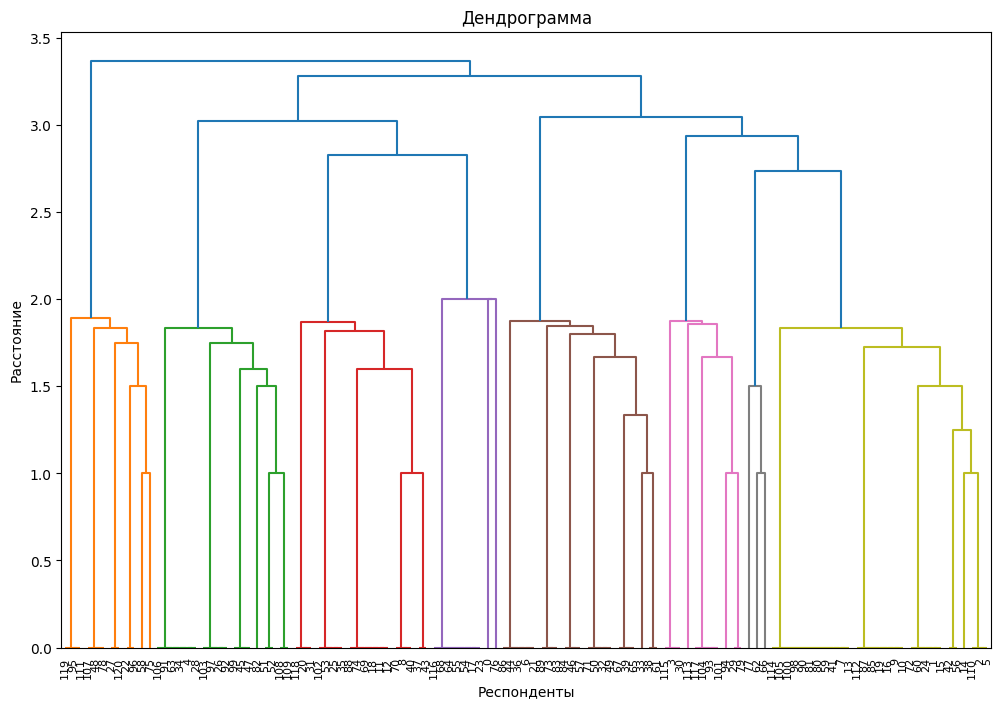

C:\Users\User\AppData\Local\Temp\ipykernel_1496\2220412623.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_cur['clusters_bin'] = model.fit_predict(text_ans)


In [44]:
Z = linkage(text_ans, method='average', metric='cityblock')

clusters = cut_tree(Z, n_clusters=3)
text_cur['clusters_bin'] = clusters[:, 0]

plt.figure(figsize=(12, 8))
dendrogram(Z, leaf_rotation=90, leaf_font_size=8)
plt.title('Дендрограмма')
plt.xlabel('Респонденты')
plt.ylabel('Расстояние')
plt.show()


model = AgglomerativeClustering(n_clusters=3, linkage='ward')
text_cur['clusters_bin'] = model.fit_predict(text_ans)


### Задача 4 (2 балла)

Выберите строки `text_cur`, соответствующие каждому их трёх кластеров, и сохраните их в датафреймы `clust0`, `clust1` и `clust2`. Для каждого такого датафрейма посчитайте суммы значений по столбцам с именами героев и выведите топ-2, то есть имена двух самых популярных героев в каждом кластере. 

Прокомментируйте полученные результаты, объясните, можно ли считать, что выбор самых популярных героев обусловлен тематически (кластер «любителей власти», кластер ценящих «свободу духа» и подобное, тут свобода творчества уже у вас).

In [45]:
clust0 = text_cur[text_cur['clusters_bin'] == 0]
clust1 = text_cur[text_cur['clusters_bin'] == 1] 
clust2 = text_cur[text_cur['clusters_bin'] == 2]

clust0_sums = clust0[['Теодор', 'Флора', 'Альбина', 'Патрик', 'Пенапью', 'Давиль', 'Оттилия', 'Жак', 'Марта', 'Марселла']].sum().sort_values(ascending=False)
clust1_sums = clust1[['Теодор', 'Флора', 'Альбина', 'Патрик', 'Пенапью', 'Давиль', 'Оттилия', 'Жак', 'Марта', 'Марселла']].sum().sort_values(ascending=False)
clust2_sums = clust2[['Теодор', 'Флора', 'Альбина', 'Патрик', 'Пенапью', 'Давиль', 'Оттилия', 'Жак', 'Марта', 'Марселла']].sum().sort_values(ascending=False)

print("Топ-2 самых популярных героев в кластере 0:")
print(clust0_sums.head(2))

print("\nТоп-2 самых популярных героев в кластере 1:")
print(clust1_sums.head(2))

print("\nТоп-2 самых популярных героев в кластере 2:")
print(clust2_sums.head(2))

Топ-2 самых популярных героев в кластере 0:
Давиль    28
Патрик    22
dtype: int64

Топ-2 самых популярных героев в кластере 1:
Марта    28
Жак      11
dtype: int64

Топ-2 самых популярных героев в кластере 2:
Жак       25
Патрик     8
dtype: int64


### Задача 5 (2 балла)

Изучите состав каждого кластера: любым разумным способом посчитайте (лучше в процентах), сколько в каждом кластере студентов женского/мужского пола, сколько представителей разных профилей. Опишите, есть ли какие-то особенности у полученных кластеров с точки зрения их состава по полу и профилю обучения.

In [47]:
print("Состав кластеров по полу:")
for cluster in [0, 1, 2]:
    cluster_data = text_cur[text_cur['clusters_bin'] == cluster]
    female_count = cluster_data[cluster_data['пол'] == 'жен'].shape[0]
    male_count = cluster_data[cluster_data['пол'] == 'муж'].shape[0]
    total_count = female_count + male_count
    print(f"Кластер {cluster}:")
    print(f"Женщины: {female_count / total_count * 100:.2f}%")
    print(f"Мужчины: {male_count / total_count * 100:.2f}%")
    
print("\nСостав кластеров по профилям обучения:")
for cluster in [0, 1, 2]:
    cluster_data = text_cur[text_cur['clusters_bin'] == cluster]
    profile_counts = cluster_data['профиль'].value_counts()
    print(f"Кластер {cluster}:")
    for profile, count in profile_counts.items():
        print(f"{profile}: {count / cluster_data.shape[0] * 100:.2f}%")

Состав кластеров по полу:
Кластер 0:
Женщины: 56.67%
Мужчины: 43.33%
Кластер 1:
Женщины: 67.86%
Мужчины: 32.14%
Кластер 2:
Женщины: 40.00%
Мужчины: 60.00%

Состав кластеров по профилям обучения:
Кластер 0:
политология и управление: 53.12%
математика и информатика: 46.88%
Кластер 1:
математика и информатика: 53.33%
политология и управление: 46.67%
Кластер 2:
политология и управление: 59.26%
математика и информатика: 40.74%


### Задача 6 (1 балл)

По аналогии с задачей 2, выберите из датафрейма `final_cur` столбцы, соответствующие основным героям сказки (с Теодора по Марселлу) и сохраните их в отдельный датафрейм `final_ans`. В датафрейме `final_ans` должно быть 10 бинарных столбцов.

In [48]:
final_ans = final_cur[['Теодор', 'Флора', 'Альбина', 'Патрик', 'Пенапью', 'Давиль', 'Оттилия', 'Жак', 'Марта', 'Марселла']]

print("Датафрейм final_ans:")
print(final_ans.head())

Датафрейм final_ans:
   Теодор  Флора  Альбина  Патрик  Пенапью  Давиль  Оттилия  Жак  Марта  \
0       0      0        0       0        0       1        1    0      0   
1       0      0        0       0        0       0        1    1      0   
2       0      0        0       0        0       0        1    1      0   
3       0      0        0       0        0       0        0    0      1   
4       0      0        0       0        0       1        1    0      0   

   Марселла  
0         0  
1         0  
2         0  
3         1  
4         0  


### Задача 7 (1 балл)

Выбор героя по текстовому описанию, при условии, что он сделан осмысленно и обдуманно, отражает интересные респонденту архетипичные образы, в то время как итоговый выбор может зависеть от воплощения героев на экране, в частности, внешности актёров и выразительности их грима и костюмов. Поэтому, чтобы учесть оба выбора, но с разным весом, предлагается создать интегральный индекс одобрения героев:

    integral = 2 * text_ans + final_ans

Если запустить эту строку кода, в `integral` будут те же 10 столбцов, но уже со значениями от 0 до 3, где 0 – респондент не выбрал героя ни в начале, ни в конце опроса, 1 – респондент выбрал героя только в конце опроса, 2 – респондент выбрал героя только в начале опроса, 3 – респондент выбрал героя и в начале опроса, и в конце после просмотра кадров.

Используя данные `integral` (нормировать здесь не нужно), реализуйте иерархический кластерный анализ, выбрав в качестве метрики евклидово расстояние и метод Варда в качестве метода агрегирования. Постройте дендрограмму. Поделите респондентов на три кластера, сохраните метки кластеров в столбец `clusters_int` в датафрейм `text_cur`.

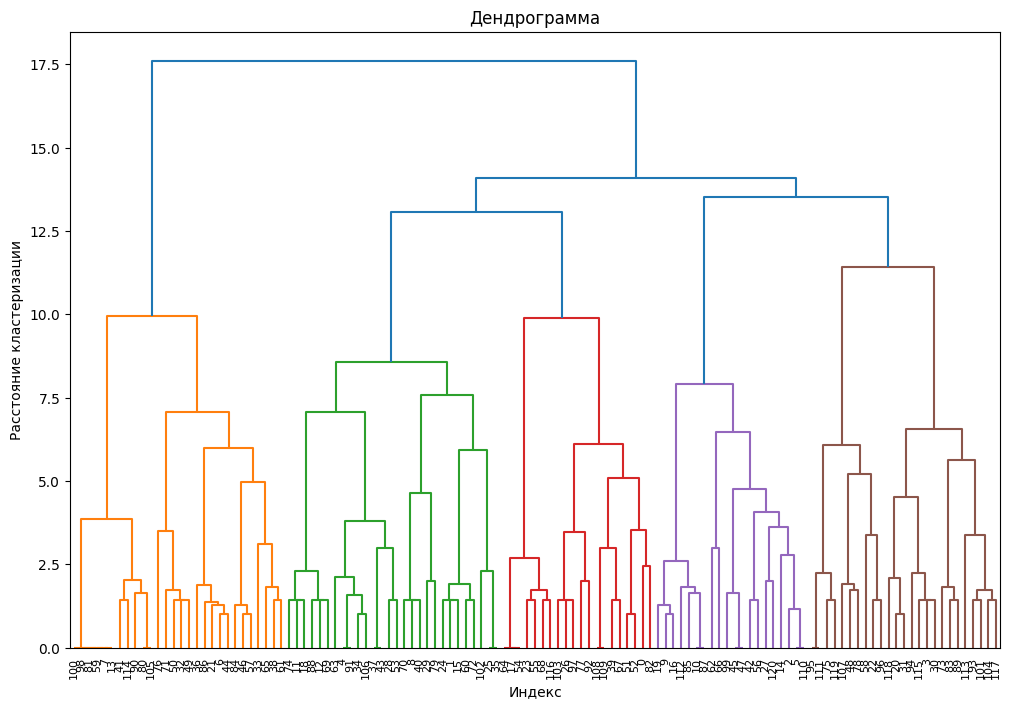

Метки кластеров в датафрейме text_cur:
clusters_int
2    48
0    45
1    28
Name: count, dtype: int64


C:\Users\User\AppData\Local\Temp\ipykernel_1496\887525543.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_cur['clusters_int'] = model.fit_predict(integral)


In [49]:
integral = 2 * text_ans + final_ans

Z = linkage(integral, 'ward')

plt.figure(figsize=(12, 8))
dendrogram(Z, leaf_rotation=90, leaf_font_size=8)
plt.title('Дендрограмма')
plt.xlabel('Индекс')
plt.ylabel('Расстояние кластеризации')
plt.show()

model = AgglomerativeClustering(n_clusters=3, linkage='ward')
text_cur['clusters_int'] = model.fit_predict(integral)

print("Метки кластеров в датафрейме text_cur:")
print(text_cur['clusters_int'].value_counts())

### Задача 8 (4 балла)

Выберите строки `text_cur`, соответствующие каждому их трёх кластеров из предыдущей задачи, и сохраните их в датафреймы `clust0_int`, `clust1_int` и `clust2_int`. Для каждого такого датафрейма посчитайте суммы значений по столбцам с именами героев и выведите топ-2, то есть имена двух самых популярных героев в каждом кластере. 

Прокомментируйте полученные результаты, объясните, можно ли считать, что выбор самых популярных героев обусловлен тематически (кластер «любителей власти», кластер ценящих «свободу духа» и подобное, тут свобода творчества уже у вас).

Изучите состав каждого кластера: любым разумным способом посчитайте (лучше в процентах), сколько в каждом кластере студентов женского/мужского пола, сколько представителей разных профилей. Опишите, есть ли какие-то особенности у полученных кластеров с точки зрения их состава по полу и профилю обучения.

In [50]:
clust0_int = text_cur[text_cur['clusters_int'] == 0]
clust1_int = text_cur[text_cur['clusters_int'] == 1] 
clust2_int = text_cur[text_cur['clusters_int'] == 2]

print("Топ-2 героев в кластере 0:")
print(clust0_int[['Теодор', 'Флора', 'Альбина', 'Патрик', 'Пенапью', 'Давиль', 'Оттилия', 'Жак', 'Марта', 'Марселла']].sum().sort_values(ascending=False).head(2))

print("\nТоп-2 героев в кластере 1:")
print(clust1_int[['Теодор', 'Флора', 'Альбина', 'Патрик', 'Пенапью', 'Давиль', 'Оттилия', 'Жак', 'Марта', 'Марселла']].sum().sort_values(ascending=False).head(2))

print("\nТоп-2 героев в кластере 2:")
print(clust2_int[['Теодор', 'Флора', 'Альбина', 'Патрик', 'Пенапью', 'Давиль', 'Оттилия', 'Жак', 'Марта', 'Марселла']].sum().sort_values(ascending=False).head(2))

Топ-2 героев в кластере 0:
Жак        23
Пенапью    18
dtype: int64

Топ-2 героев в кластере 1:
Марта    27
Жак      11
dtype: int64

Топ-2 героев в кластере 2:
Давиль    26
Патрик    18
dtype: int64


В 0 класстере самые популярные герои обожают погружаться в технические задачи, что можно сказать,что они "Класстер фанатов ПИ-числа", отвечаю они часами пытаются вычислить число ПИ, и пока что Жак выигрывает вэтом деле

А вот в 1 класстере, ребята за "Класстер духовности и Дзена", они познали гармонию чисел и теперь живут в нирване

В 2 класстер эти ребята не так просты, они у нас "Класстер манипуляций", с ними лучше не разговаривать, особенно с данными представилятелями

In [51]:
print("\nСостав кластеров по полу:")
print(text_cur.groupby('clusters_int')['пол'].value_counts(normalize=True))

print("\nСостав кластеров по профилю:")
print(text_cur.groupby('clusters_int')['профиль'].value_counts(normalize=True))


Состав кластеров по полу:
clusters_int  пол
0             муж    0.604651
              жен    0.395349
1             жен    0.692308
              муж    0.307692
2             жен    0.636364
              муж    0.363636
Name: proportion, dtype: float64

Состав кластеров по профилю:
clusters_int  профиль                 
0             математика и информатика    0.511111
              политология и управление    0.488889
1             математика и информатика    0.535714
              политология и управление    0.464286
2             политология и управление    0.604167
              математика и информатика    0.395833
Name: proportion, dtype: float64


В нулевом кластере преобладает мужской пол, а вот в 1 и 2 женский, что показывает на различные интересы в напралениях у людей.
По профилю, 0 и 1 класстер препочитыют математику и информатику, что показывает их отношение к техническим наукам, а вот 2 класстер наоборот больше за управление и политологию.

### Задача 9 (1 балл)

Сравните результаты кластеризации из задач 3-4 (только на текстовом описании) и задач 7-8 (индекс от 0 до 3). Какая кластеризация вам кажется более осмысленной, наглядной? 

Обе кластеризации представляются осмысленными и наглядными. Каждый подход имеет свои преимущества:
- Кластеризация на основе текстовых описаний (задачи 3-4) лучше раскрывает тематические предпочтения респондентов.
- Кластеризация на основе интегрального индекса (задачи 7-8) дает более комплексную оценку, учитывая как текстовые описания, так и финальный выбор.

В целом, я считаю, что кластеризация из задач 7-8 является более полной и информативной